In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv dosyasını df dataframeine aktarıyoruz

In [2]:
df = pd.read_csv('dataset_Facebook.csv', delimiter=';')

In [3]:
df.head(5)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80


Eksik(NaN) değerlerinin hangi sütunda kaç tane olduğunu tespit ediyoruz.

In [4]:
missing_values = df.isnull().sum()
missing_values

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

Eksik(NaN) değerleri bulundukları sütunların ortalamasıyla dolduruyoruz.

In [5]:
df['Paid'].fillna(df['Paid'].mean(), inplace=True)
df['like'].fillna(df['like'].mean(), inplace=True)
df['share'].fillna(df['share'].mean(), inplace=True)

In [6]:
missing_values = df.isnull().sum()
missing_values

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

Kategorik olan Type sütununu önce labelencode yapıyoruz 1,2,3,4 gibi değerler atıyor. Fakat bu şekilde dönüşüm yaparsak model aralarında önem sırası olduğunu düşünecek bunu çözmek için OneHotEncoding dönüşü yapıyoruz. Böylelikle aralarında büyüklük ilişkisi ortadan kalkıyor.

In [7]:
# Kategorik veri değiştirme
Type = df.iloc[:, 1:2].values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Type[:,0] = le.fit_transform(df.iloc[:,1])
#one hot encoding
ohe = preprocessing.OneHotEncoder()
Type = ohe.fit_transform(Type).toarray()

In [8]:
# Verileri Birleştirme
sonuc = pd.DataFrame(data=Type, index = range(500), columns = ['Link', 'Photo', 'Status', 'Video'])
df2 = pd.concat([sonuc,df], axis=1)
df2.drop('Type', axis =1, inplace=True)

In [9]:
df2.head(3)

,Link,Photo,Status,Video,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,...,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,0.0,1.0,0.0,0.0,139441,2,12,4,3,0.0,...,178,109,159,3078,1640,119,4,79.0,17.0,100
1,0.0,0.0,1.0,0.0,139441,2,12,3,10,0.0,...,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,0.0,1.0,0.0,0.0,139441,3,12,3,3,0.0,...,177,113,154,2812,1503,132,0,66.0,14.0,80


In [10]:
df3=df2.copy()

Proje açıklamasındaki "Modellemeye çalışabileceğimiz birçok olası özellik var ancak biz “Total Interactions” ‘e
odaklanacağız. Özellik alanımız şunları içerecektir: “Category”, “Page total likes”, “Post month”,
“Post hour”, “Post weekday”, ve “Paid”. Ön işlemeyi önlemek için "Type" seçeneğini bırakıyoruz." ifadesine göre X ve y değişkenlerimizi ayarlıyoruz.

In [11]:
# Verileri bölme
X = df2.iloc[:,:10]
X.head(1)

,Link,Photo,Status,Video,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid
0,0.0,1.0,0.0,0.0,139441,2,12,4,3,0.0


In [12]:
y= df2.iloc[:,-1:]
y.head(1)

,Total Interactions
0,100


StandardScaler ile özniteliklerimizi ölçeklendiriyoruz.

In [13]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X = sc1.fit_transform(X)
sc2 = StandardScaler()
y= sc2.fit_transform(y)

Veriyi eğitim ve test setlerine bölelim

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
def add_bias_feature(X):
    return np.column_stack((np.ones(len(X)), X))

X_train'in ilk sütununa bias hesaplamak için 1'ler ekliyoruz

In [16]:
X_train = add_bias_feature(X_train)

başlangıç ağırlığı 0 olan arrayı oluşturuyoruz. X_trainin satır sayısı kadar sıfırlardan oluşan bir array oluşturuyoruz

In [17]:
theta_initial = np.zeros((X_train.shape[1],1))

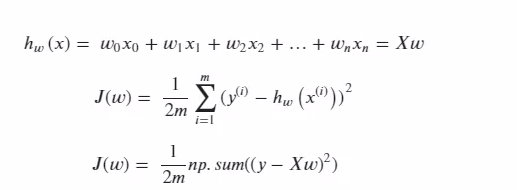

In [18]:
def compute_cost(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return cost

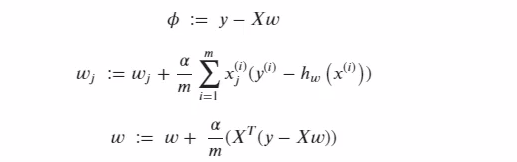

In [19]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []
    
    for _ in range(num_iterations):
        h = X.dot(theta)
        error = h - y
        gradient = (1 / m) * X.T.dot(error)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
    return theta, cost_history

In [20]:
# Hyperparameters
alpha = 0.01
num_iterations = 1000
# Run gradient descent
theta_final, cost_history = gradient_descent(X_train, y_train, theta_initial, alpha, num_iterations)

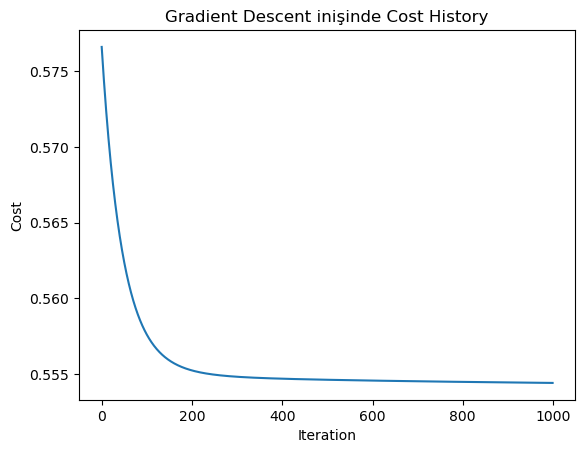

In [21]:
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Gradient Descent inişinde Cost History')
plt.show()

gradient_descent sonucunda oluşan theta_final ilk değeri bias'tır. Diğerleri thetalardır.

In [22]:
theta = theta_final[1:]
bias = theta_final[0]

In [33]:
print("Ağırlık Matrisi:", theta_final[1:])
print("Bias Değeri:", theta_final[0])

Ağırlık Matrisi: [[-0.03781379]
 [ 0.00523992]
 [ 0.00351081]
 [ 0.04162039]
 [ 0.07994523]
 [ 0.14431995]
 [-0.0349313 ]
 [-0.06703311]
 [ 0.00841553]
 [ 0.10911716]]
Bias Değeri: [0.0139955]


Önceden X_traine eklediğimiz eklediğimiz biasları kaldıralım.

In [23]:
X_train = X_train[:, 1:]

$$
h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n + c
$$

In [24]:
def predict(X, weight, bias):
    return np.dot(X, weight) + bias

In [25]:
y_pred_test = predict(X_test, theta, bias)
y_pred_train = predict(X_train, theta, bias)

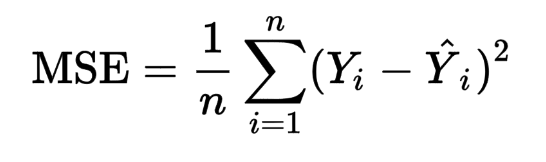

In [26]:
# Eğitim ve test hatalarını hesaplama
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [27]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f"Eğitim seti hatası mse: {train_mse}")
print(f"Test seti hatası mse: {test_mse}")

Eğitim seti hatası mse: 1.1088337510633506
Test seti hatası mse: 0.36877063352986567


In [28]:
from sklearn.metrics import r2_score 

In [29]:
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
print(f"Eğitim seti hatası r2: {train_r2}")
print(f"Test seti hatası r2: {test_r2}")

Eğitim seti hatası r2: 0.03891202904236302
Test seti hatası r2: 0.01780083624642348


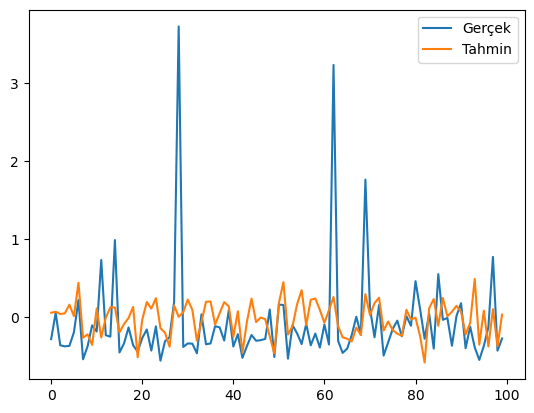

In [30]:
data = pd.DataFrame({"Gerçek": y_test.flatten(), "Tahmin": y_pred_test.flatten()})
data.plot(kind="line")
plt.show()

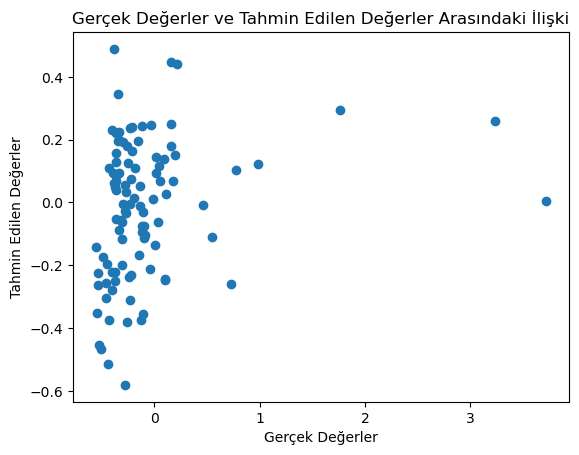

In [31]:
# Gerçek ve tahmin edilen değerler arasındaki ilişkiyi görselleştirelim
plt.scatter(y_test, y_pred_test)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek Değerler ve Tahmin Edilen Değerler Arasındaki İlişki")
plt.show()

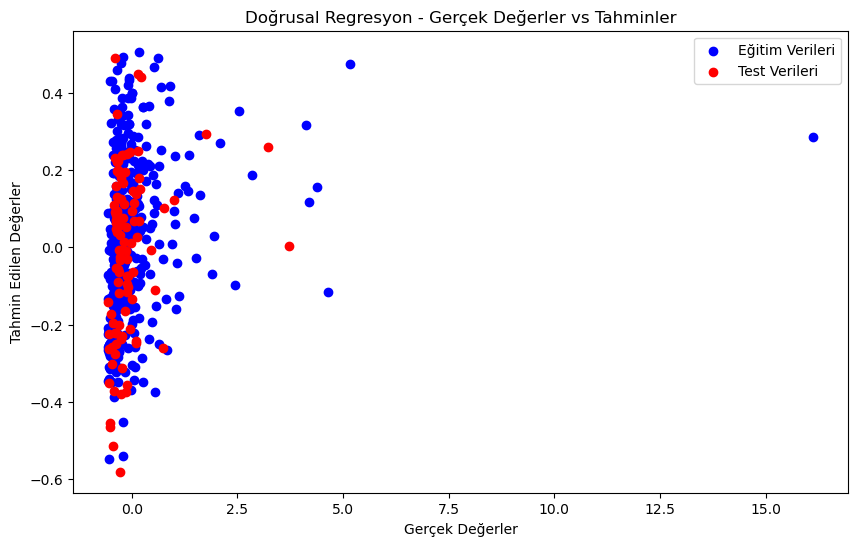

In [32]:
# Eğitim ve test hatalarını çizme
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Eğitim Verileri')
plt.scatter(y_test, y_pred_test, color='red', label='Test Verileri')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Doğrusal Regresyon - Gerçek Değerler vs Tahminler')
plt.legend()
plt.show()

Ağırlık matrisini, bias değerini ekrana yazıralım

Projede istenen sütunları kullandığımzda model genel olarak kötü performans sergiliyor o yüzden başka öznitelikler alarak yeni bir model oluşturalım

Burada veri setindeki Total Interactions hariç tüm sutunları X'e atıyoruz.
y'ye Total Interactions atıyoruz.

In [34]:
# Verileri bölme
X = df3.iloc[:,:-1]
y= df3.iloc[:,-1:]

In [35]:
import statsmodels.api as sm
# Sabit bir sütun ekleyerek modele eklemek
X = sm.add_constant(X)
# Model oluşturma
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total Interactions   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.159e+04
Date:                Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:29:45   Log-Likelihood:                -1814.3
No. Observations:                 500   AIC:                             3671.
Df Residuals:                     479   BIC:                             3759.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -0.0130      6.129     -0.002      0.998     -12.057      12.031
Link                                                                    1.0336      2.176      0.475      0.635      -3.241       5.309
Photo                                                                  -0.8856      1.913     -0.463      0.644      -4.646       2.874
Status                                                                 -2.1360      2.511     -0.851      0.395      -7.069       2.797
Video                                                                   1.9749      3.508      0.563      0.574      -4.919       8.869
Page total likes                                                     6.232e-06   8.09e-05      0.077      0.939      -0.000       0.000
Category                                                                1.0676      0.567      1.883      0.060      -0.046       2.182
Post Month                                                             -0.2662      0.403     -0.661      0.509      -1.058       0.525
Post Weekday                                                           -0.2541      0.209     -1.213      0.226      -0.666       0.157
Post Hour                                                              -0.0269      0.101     -0.266      0.790      -0.226       0.172
Paid                                                                    0.6440      0.955      0.674      0.500      -1.233       2.521
Lifetime Post Total Reach                                            -4.33e-05   8.34e-05     -0.519      0.604      -0.000       0.000
Lifetime Post Total Impressions                                      1.372e-05   2.96e-05      0.464      0.643   -4.44e-05    7.18e-05
Lifetime Engaged Users                                                  0.0603      0.013      4.491      0.000       0.034       0.087
Lifetime Post Consumers                                                -0.0605      0.013     -4.514      0.000      -0.087      -0.034
Lifetime Post Consumptions                                              0.0003      0.000      1.056      0.292      -0.000       0.001
Lifetime Post Impressions by people who have liked your Page        -1.555e-05   3.25e-05     -0.479      0.632   -7.94e-05    4.83e-05
Lifetime Post reach by people who like your Page                     5.771e-05      0.000      0.329      0.742      -0.000       0.000
Lifetime People who have liked your Page and engaged with your post     0.0031      0.002      1.534      0.126      -0.001       0.007
comment                                                                 1.0868      0.044  

Geriye Doğru Eleme Yöntemi kullanarak en yüksek p değerine sahip değişkeni modelden çıkararak en sonunda p değerlerini 0.5’in altında bırakarak X özniteliklerimizi seçicez

Her seferinde tek bir özniteliği çıkarıp tekrar konrol eden bir dögü oluşturalım

In [36]:
def backward_elimination(x, y, significance_level=0.5):
    num_vars = x.shape[1]
    for i in range(0, num_vars):
        model = sm.OLS(y, x).fit()
        max_pval = max(model.pvalues)
        if max_pval > significance_level:
            max_index = np.where(model.pvalues == max_pval)[0][0]
            x = np.delete(x, max_index, 1)
        else:
            break
    print(model.summary())
    return x

Geriye Doğru Eleme Yöntemi sonucunda oluşan optimal öznitelikleri X'atıyoruz.

In [37]:
X_optimized = backward_elimination(X, y)
X = X_optimized

                                 OLS Regression Results                                
Dep. Variable:     Total Interactions   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.521e+04
Date:                Tue, 26 Dec 2023   Prob (F-statistic):                        0.00
Time:                        09:29:45   Log-Likelihood:                         -1814.7
No. Observations:                 500   AIC:                                      3655.
Df Residuals:                     487   BIC:                                      3710.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Optimize öznitelikleri kullanarak modelimiz tekrar eğitelim

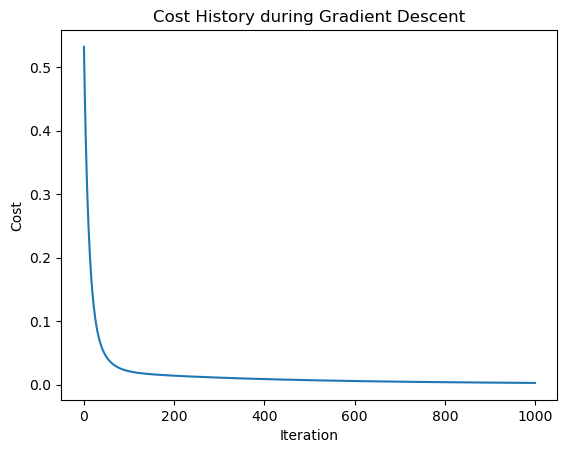

Eğitim seti hatası mse: 0.005065699406575468
Test seti hatası mse: 0.007699839886289808
Eğitim seti hatası r2: 0.9956092761791585
Test seti hatası r2: 0.9794919236790643


In [38]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X = sc1.fit_transform(X)
sc2 = StandardScaler()
y= sc2.fit_transform(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = add_bias_feature(X_train)

theta_initial = np.zeros((X_train.shape[1],1))
alpha = 0.01
num_iterations = 1000
theta_final, cost_history = gradient_descent(X_train, y_train, theta_initial, alpha, num_iterations)

import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History during Gradient Descent')
plt.show()

theta = theta_final[1:]
bias = theta_final[0]

X_train = X_train[:, 1:]

y_pred_test = predict(X_test, theta, bias)
y_pred_train = predict(X_train, theta, bias)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Eğitim seti hatası mse: {train_mse}")
print(f"Test seti hatası mse: {test_mse}")

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Eğitim seti hatası r2: {train_r2}")
print(f"Test seti hatası r2: {test_r2}")

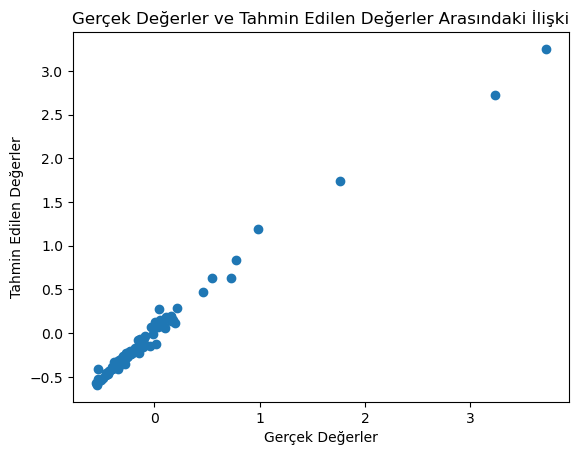

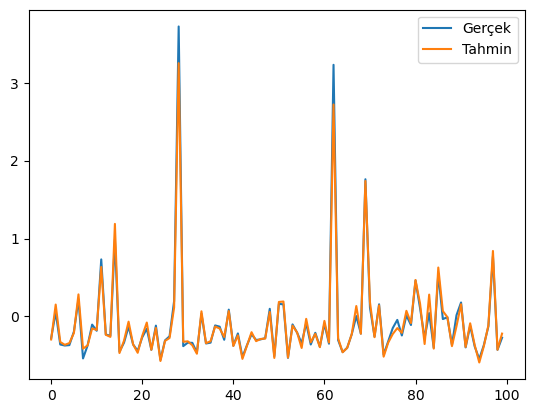

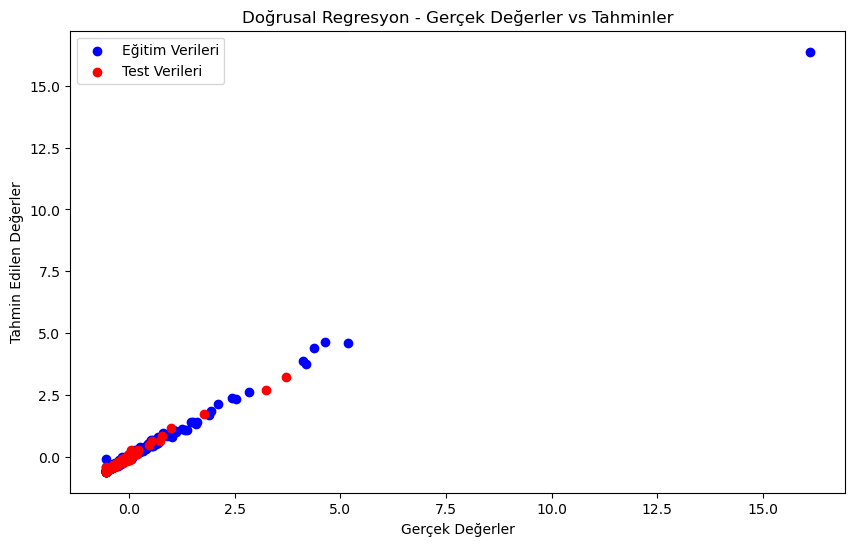

In [39]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek Değerler ve Tahmin Edilen Değerler Arasındaki İlişki")
plt.show()


data = pd.DataFrame({"Gerçek": y_test.flatten(), "Tahmin": y_pred_test.flatten()})
data.plot(kind="line")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Eğitim Verileri')
plt.scatter(y_test, y_pred_test, color='red', label='Test Verileri')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Doğrusal Regresyon - Gerçek Değerler vs Tahminler')
plt.legend()
plt.show()

In [40]:
print("Ağırlık Matrisi:", theta_final[1:])
print("Bias Değeri:", theta_final[0])

Ağırlık Matrisi: [[ 0.0009276 ]
 [-0.0100242 ]
 [ 0.00271464]
 [ 0.00607958]
 [-0.00774379]
 [ 0.01250638]
 [ 0.10246259]
 [-0.09740708]
 [-0.00902195]
 [ 0.03505636]
 [ 0.09616877]
 [ 0.63930072]
 [ 0.23774642]]
Bias Değeri: [-0.00036648]
